## This Notebook tests the dataset class

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import torch
import torchvision
import tqdm
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from torch.utils.data import DataLoader

from dataset import SamDataset


In [3]:
dataroot = Path('C:','\\', 'Users', 'michalro', 'chess_detector', 'chessred') #Change this to match the computer you are working from!
data_path=Path(dataroot, 'annotations.json')
if not data_path.is_file():
    raise(FileNotFoundError(f"File '{data_path}' doesn't exist."))
device = 'cuda' if torch.cuda.is_available() else 'cpu' # set the device according to availability
print(f"device = {device}")

device = cuda


In [4]:
train_dataset = SamDataset(dataroot=dataroot, classifier='pb', split='train', crop = False)
val_dataset = SamDataset(dataroot=dataroot, classifier='pb', split='val', crop = False)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True) #batch size might be too small!
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)

In [8]:
for data, label in train_loader:
    break

torch.Size([1, 256, 256, 3])
tensor([0])


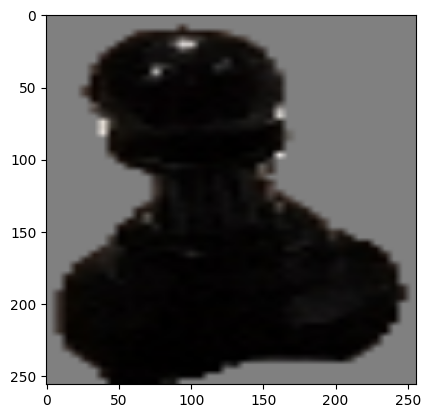

In [9]:
# cell to visualize the dataLoader output for crop=false
plt.imshow(data[0])
print(data.shape)
print(label)

In [11]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
normalize = torchvision.transforms.Normalize(mean=mean, std=std)
print(data.shape)

torch.Size([1, 256, 256, 3])


In [48]:
# cell to visualize dataloader output
for data, label in train_loader:
    print(f'{data.shape=}')
    permutted_data = data.permute(0,3,1,2)
    print(f'{permutted_data.shape=}')
    plt.imshow(permutted_data.permute(0,2,3,1)[0])
    print(label)
    break

TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Tensor'

In [44]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  